In [ ]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [ ]:
pip install pandas

In [ ]:
genes = ['gene' + str(i) for i in range(1, 101)]
wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range (1,6)]
data = pd.DataFrame(columns = [*wt, *ko], index =genes) #распаковка, * делает один массив из 10 эелементов а не 2 по 5 
# пустой датафрейм с генами 

In [ ]:
for gene in data.index: #заполняем датафрейм
  data.loc[gene, 'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10, 1000), size =5)  #локирует по датафрейму в конкретному месту, в датасете локирует место по индексу(названию) строки
  data.loc[gene, 'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10, 1000), size =5)

In [ ]:
data

In [ ]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,503,508,506,534,495,434,402,428,466,452
gene2,391,408,418,426,436,828,794,790,791,799
gene3,702,648,734,638,708,786,803,812,817,822
gene4,879,867,826,824,845,255,296,294,275,273
gene5,147,159,155,149,144,957,930,964,1013,905


In [ ]:
scaled_data = preprocessing.scale(data.T)

In [ ]:
pca = PCA() #не указано количетсво пса, авт выбран минимум между мин фичей и мин компонентов

In [ ]:
pca.fit(scaled_data) # фит поворот и сдвиг 

PCA()

In [ ]:
pca_data = pca.transform(scaled_data) # трнасформ понизил размерность, получ уже спроец данные

In [ ]:
scaled_data.shape #было размерность

(10, 100)

In [ ]:
pca_data.shape #стало

(10, 10)

In [ ]:
per_var = np.round(pca.explained_variance_ratio_ *100, decimals=1) #EVR показывает колько на себя каждая компонента берет разброса
labels = ['PC' + str(x) for x in range (1,  len(per_var)+1)]
#сумм дисперсия всех компонент = сумм дисперсия исх данных

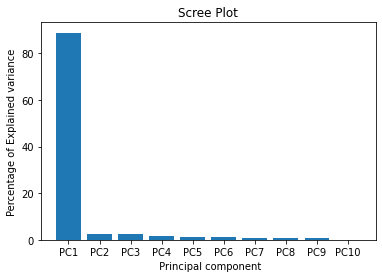

In [ ]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = labels) #график
plt.ylabel('Percentage of Explained variance')
plt.xlabel(' Principal component')
plt.title('Scree Plot')
plt.show() #по графику видно что 1 компонента самая информативная тк у нее больше всего разброса